In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
import seaborn as sns

In [2]:
# RMSSD Maxdiff
EKG_RMSSD_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet1")
PPG_RMSSD_maxdiff=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet2")
PPG_RMSSD_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet3")
# SDNN Maxdiff
EKG_SDNN_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet4")
PPG_SDNN_maxdiff=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet5")
PPG_SDNN_maxdiff_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet6")
# RMSSD footpoint
EKG_RMSSD_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet7")
PPG_RMSSD_foot=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet8")
PPG_RMSSD_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet9")
# SDNN footpoint
EKG_SDNN_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet10")
PPG_SDNN_foot=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet11")
PPG_SDNN_foot_outlierkorr=pd.read_excel('Tabell - HRV beregninger.xlsx', sheet_name="Sheet12")

$ (x,y) = ((S_1 + S_2)/2), (S_1-S_2) $

https://en.wikipedia.org/wiki/Bland%E2%80%93Altman_plot

In [3]:
def plotblandaltman(x,y,title,sd_limit):
    plt.figure(figsize=(20,8))
    plt.suptitle(title)
    if len(x.loc[0]) != len(y.loc[0]):
        raise ValueError('x does not have the same length as y')
    else:
        for i in range(len(x.loc[0])):
            a = np.asarray(x.iloc[0:,i])
            #a = np.asarray(x.iloc[0:,i])+np.asarray(y.iloc[0:,i])/2
            b = np.asarray(x.iloc[0:,i])-np.asarray(y.iloc[0:,i])
            mean_diff = np.mean(b)
            std_diff = np.std(b, axis=0)
            limit_of_agreement = sd_limit * std_diff
            lower = mean_diff - limit_of_agreement
            upper = mean_diff + limit_of_agreement
            plt.subplot(2 ,3 , i+1)
            plt.axhline(y=mean_diff, linestyle = "--", color = "red", label="mean diff")
            plt.axhline(y=lower, linestyle = "--", color = "grey", label="-1.96 SD")
            plt.axhline(y=upper, linestyle = "--", color = "grey", label="1.96 SD")
            plt.ylim(-1300, 1300)
            '''
            plt.annotate('mean diff:\n{}',
                xy=(0.99, 0.5),
                horizontalalignment='right',
                verticalalignment='center',
                fontsize=14,
                xycoords='axes fraction')
            '''
            sns.scatterplot(x=a,y=b, legend='brief')
            plt.title(x.columns[i])
            plt.show

In [4]:
test1=[
    [EKG_RMSSD_maxdiff_outlierkorr,PPG_RMSSD_maxdiff,PPG_RMSSD_maxdiff_outlierkorr],
    [EKG_SDNN_maxdiff_outlierkorr,PPG_SDNN_maxdiff,PPG_SDNN_maxdiff_outlierkorr],
    [EKG_RMSSD_foot_outlierkorr,PPG_RMSSD_foot,PPG_RMSSD_foot_outlierkorr],
    [EKG_SDNN_foot_outlierkorr, PPG_SDNN_foot, PPG_SDNN_foot_outlierkorr]
]

In [5]:
Titles=['EKG RMSSD maxdiff Outliercorr VS PPG RMSSD maxdiff', 'EKG RMSSD maxdiff outliercorr VS PPG RMSSD maxdiff outliercorr', 'EKG SDNN maxdiff outliercorr VS PPG SDNN maxdiff', 'EKG SDNN maxdiff Outliercorr VS PPG SDNN maxdiff outliercorr', 'EKG RMSSD foot outliercorr VS PPG RMSSD foot','EKG RMSSD foot outliercorr VS PPG RMSSD foot outliercorr','EKG SDNN foot outliercorr VS PPG SDNN foot','EKG SDNN foot outliercorr VS PPG SDNN foot outliercorr']

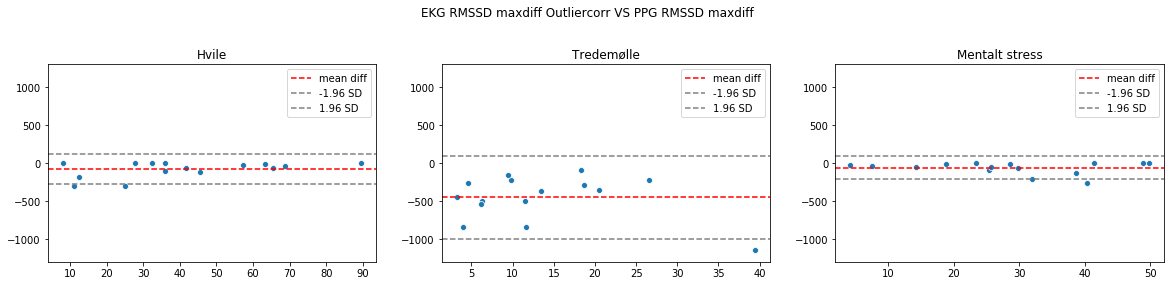

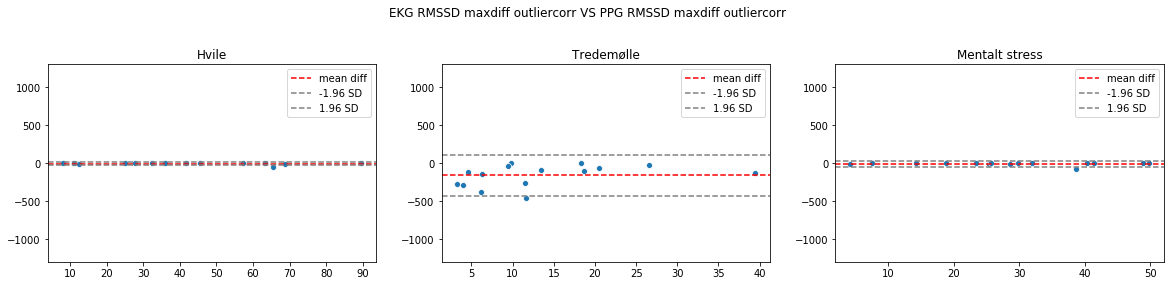

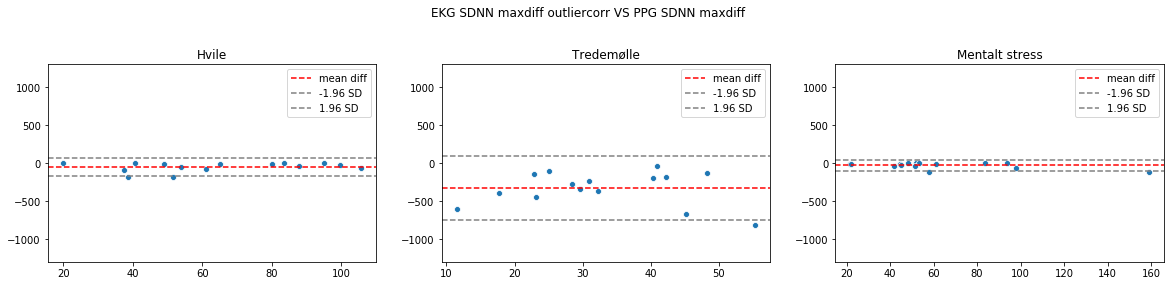

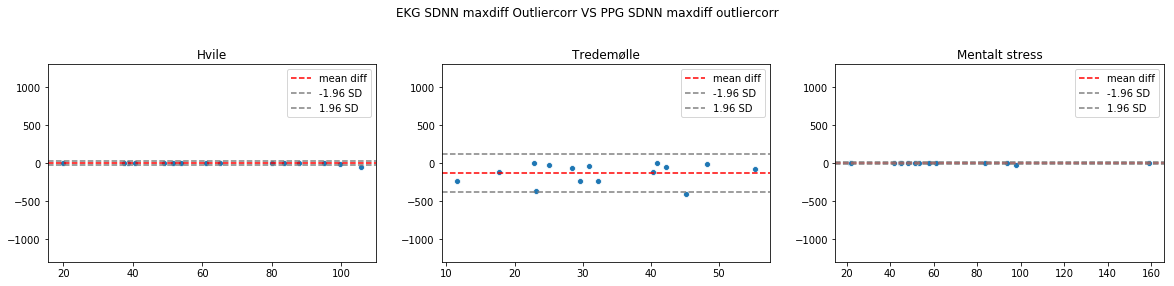

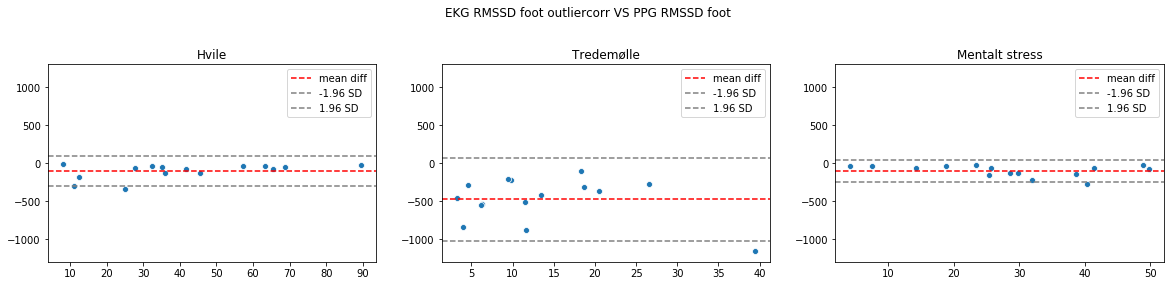

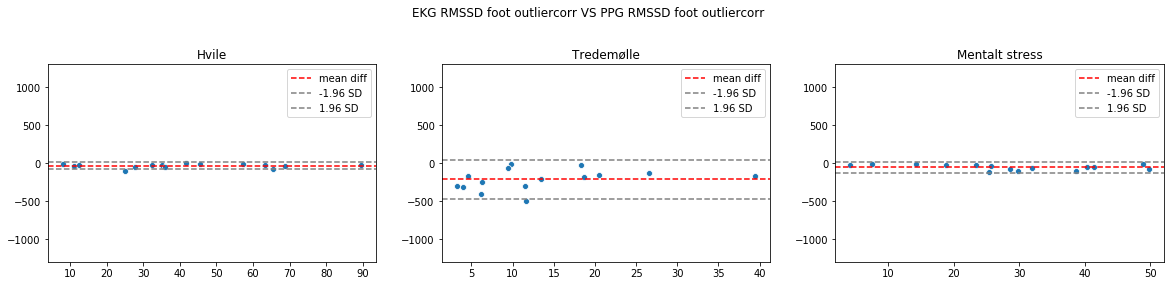

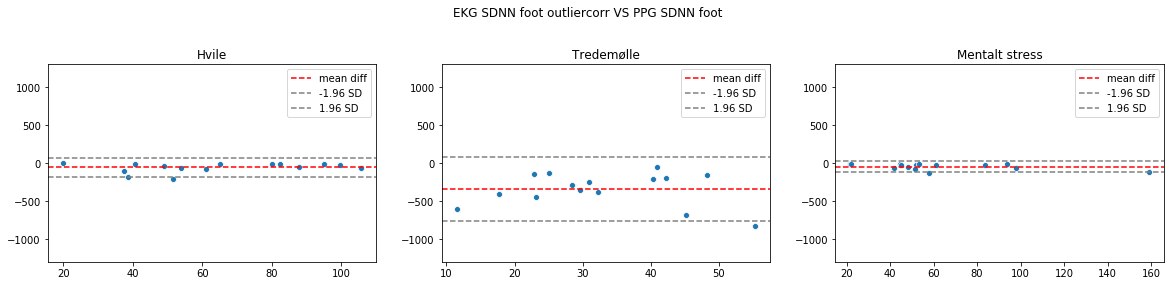

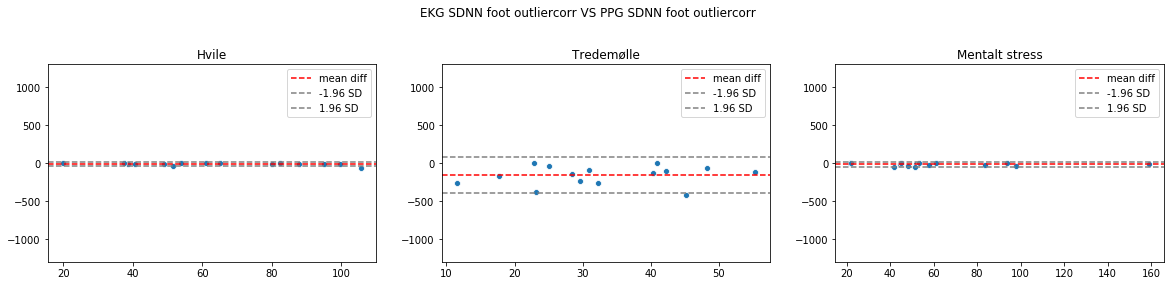

In [6]:
k = 0
for i in range(4):
    x=test1[i]
    for j in range(2):
        plotblandaltman(x[0],x[j+1],Titles[k],1.96)
        k += 1

In [8]:
!pip freeze > requirements.txt